# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [27]:
import pandas as pd
import numpy as np

# Your code here. 

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30],
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]}
                           )

Draw a dispersion diagram (scatter plot) for the data.

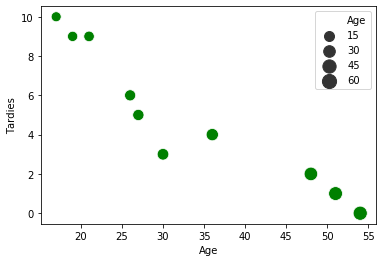

In [22]:
# Your code here.

import seaborn as sns 
import pandas as pd
import numpy as np

sns.scatterplot(x = 'Age', y = 'Tardies', data = student_data, color = "green", size = "Age", sizes = (100,200))

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [23]:
# Your response here. 

print("La tendencia es que mientras mas joven es la persona, más tardanza tiene y viceversa")

La tendencia es que mientras mas joven es la persona, más tardanza tiene y viceversa


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [25]:
# Your response here.
print("Tienen una gran correlación")
student_data.corr()


Tienen una gran correlación


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [30]:
print('Tenemos una covarianzas similares')
np.cov(student_data['Age'], student_data['Tardies'])



Tenemos una covarianzas similares


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [31]:
# Your response here.

import statsmodels.api as sm

X = sm.add_constant(student_data['Age']) # We must add the intercept using the add_constant function
Y = student_data['Tardies']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


#Tenemos una gran probabilidad 
#Tenemos una F Statistic bastante elevada 
#Tenemos un R-squared bastante bajo lo cual nuestra regresión lineal va a ser aceptada 
print('We got a R-squared of 88.2% (near to 100%), meaning the higher the R-square, the better the model fits the data.')
print('We reject the null hypothesis since our p-value of F-statistics is down below the 5%, so our students may be related between their age and their frecuency of tardies.')


                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           5.57e-05
Time:                        16:29:20   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Plot your regression model on your scatter plot.

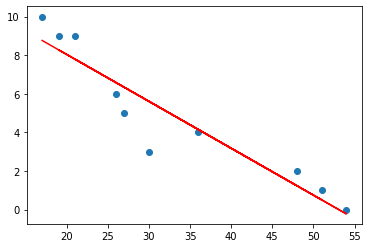

In [35]:
# Your code here.

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = student_data['Age'].values.reshape(-1, 1)  # convierto la variable en numpy's
Y = student_data['Tardies'].values.reshape(-1, 1) # dimensiones correctas
linear_regressor = LinearRegression()  # crear 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [29]:
# Your response here. 

print('The model applied is the OLS, which performs a prediction that minimize the distances between the data and the predition line. From this visualized poit of view, it seems that the prediction line fits the trend of the data. Also, there are outliers that needs to be computed for a better prediction performance.')

The model applied is the OLS, which performs a prediction that minimize the distances between the data and the predition line. From this visualized poit of view, it seems that the prediction line fits the trend of the data. Also, there are outliers that needs to be computed for a better prediction performance.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 

vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here. 

import statsmodels.api as sm
#Aca lo que vamos a realizar es utilizar mayor de un conector para generar mi regresión 

#Estas son mis constantes
X = sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]) 
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                             17:15:25   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [17]:
# Your response here. 
#Las variables mas importantes del modelo son F Statistics , R Squared. 
#Tenemos una poca regresión.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [18]:
# Your code here. 

import pandas as pd
import numpy as np

# Your code here. 

party = pd.DataFrame({'n_invited': [1,3,4,6,8,9,11,14],
                      'n_attended': [1,2,4,4,5,7,8,13]}
                           )

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

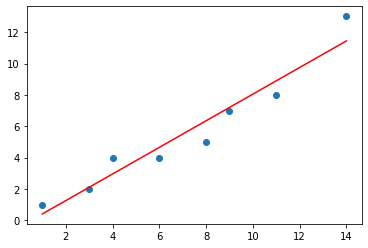

In [19]:
# Your code here.

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = party['n_invited'].values.reshape(-1, 1)  # convierto la variable en numpy's
Y = party['n_attended'].values.reshape(-1, 1) # dimensiones correctas
linear_regressor = LinearRegression()  # crear 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

print('Tienen una gran relación entre ambas')

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

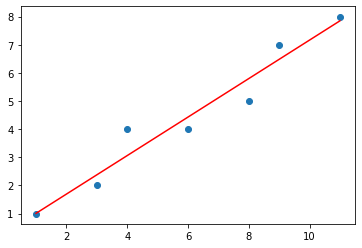

In [25]:
new_party = party[0:7]

X = new_party['n_invited'].values.reshape(-1, 1)  # convierto la variable en numpy's
Y = new_party['n_attended'].values.reshape(-1, 1) # dimensiones correctas
linear_regressor = LinearRegression()  # crear 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# There is a slightly better fit, however not significant.